In [99]:
#Imports 
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import numpy as np
import pandas as pd

Basado en : https://www.kaggle.com/python10pm/matplotlib-learn-40-plots-step-by-step/data

---

## 50 Plots Challenge 

### Gráfico  n°1 

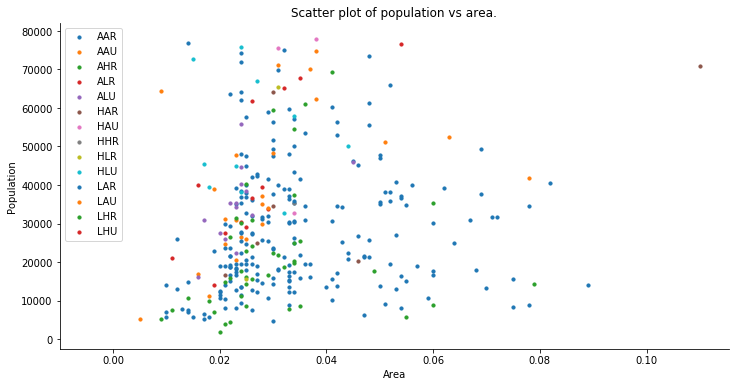

In [146]:
#----------------------------------------
# load the data and separate X and Y
PATH = r'Datos\the-50-plot-challenge\midwest_filter.csv' 

df = pd.read_csv(PATH)

#----------------------------------------
# plot the data
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot()

for cat in sorted(list(df["category"].unique())):
    ar = df[df["category"] == cat]["area"]
    pop = df[df["category"] == cat]["poptotal"]
    ax.scatter(ar, pop, label = cat, s = 10)
    
#----------------------------------------
## prettify the data
ax.spines["top"].set_color("none")# eliminamos recuadros
ax.spines["right"].set_color("None")

ax.set_xlabel("Area")
ax.set_ylabel("Population")


ax.set_xlim(-0.01) # this will allow us to see the legend on the left
ax.set_title("Scatter plot of population vs area.")
ax.legend(loc = "upper left");

###  Gráfico n°2 

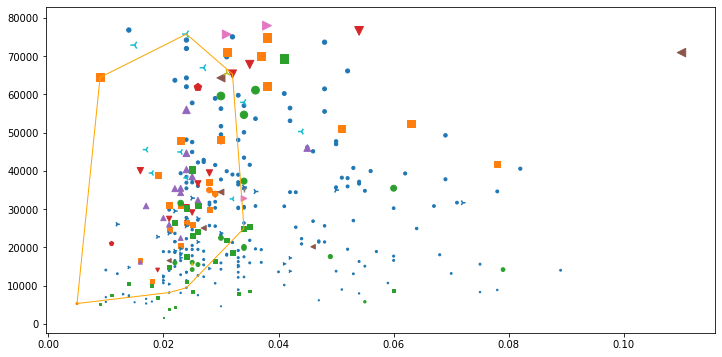

In [164]:
from scipy.spatial import ConvexHull

#----------------------------------------
# load the data and separate X and Y
PATH = r'Datos/the-50-plot-challenge/midwest_filter.csv'  
df = pd.read_csv(PATH)

#----------------------------------------
# plot the data
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)

size_total = df["poptotal"].sum()
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]

for cat, marker in zip(sorted(list(df["category"].unique())), markers):
    ar = df[df["category"] == cat]["area"]
    pop = df[df["category"] == cat]["poptotal"]
    size = pop/size_total
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker)

#----------------------------------------
# create an encircle
# based on this solution
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
encircle_data = df[df["state"] == "IN"]
encircle_x = encircle_data["area"]
encircle_y = encircle_data["poptotal"]

p = np.c_[encircle_x,encircle_y]
hull = ConvexHull(p)
poly = plt.Polygon(p[hull.vertices,:], ec="orange", fc="none")
ax.add_patch(poly)

